In [2]:
# Random Forest Model and make predictions
import pandas as pd
data = pd.read_csv('Breast_cancer_data.csv')
print(data.head())
print(data.info())
print(data.describe())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 n

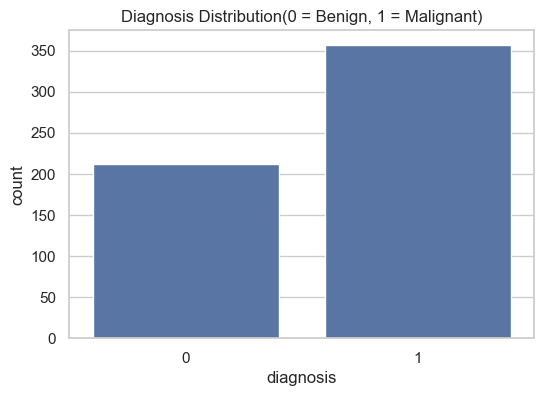

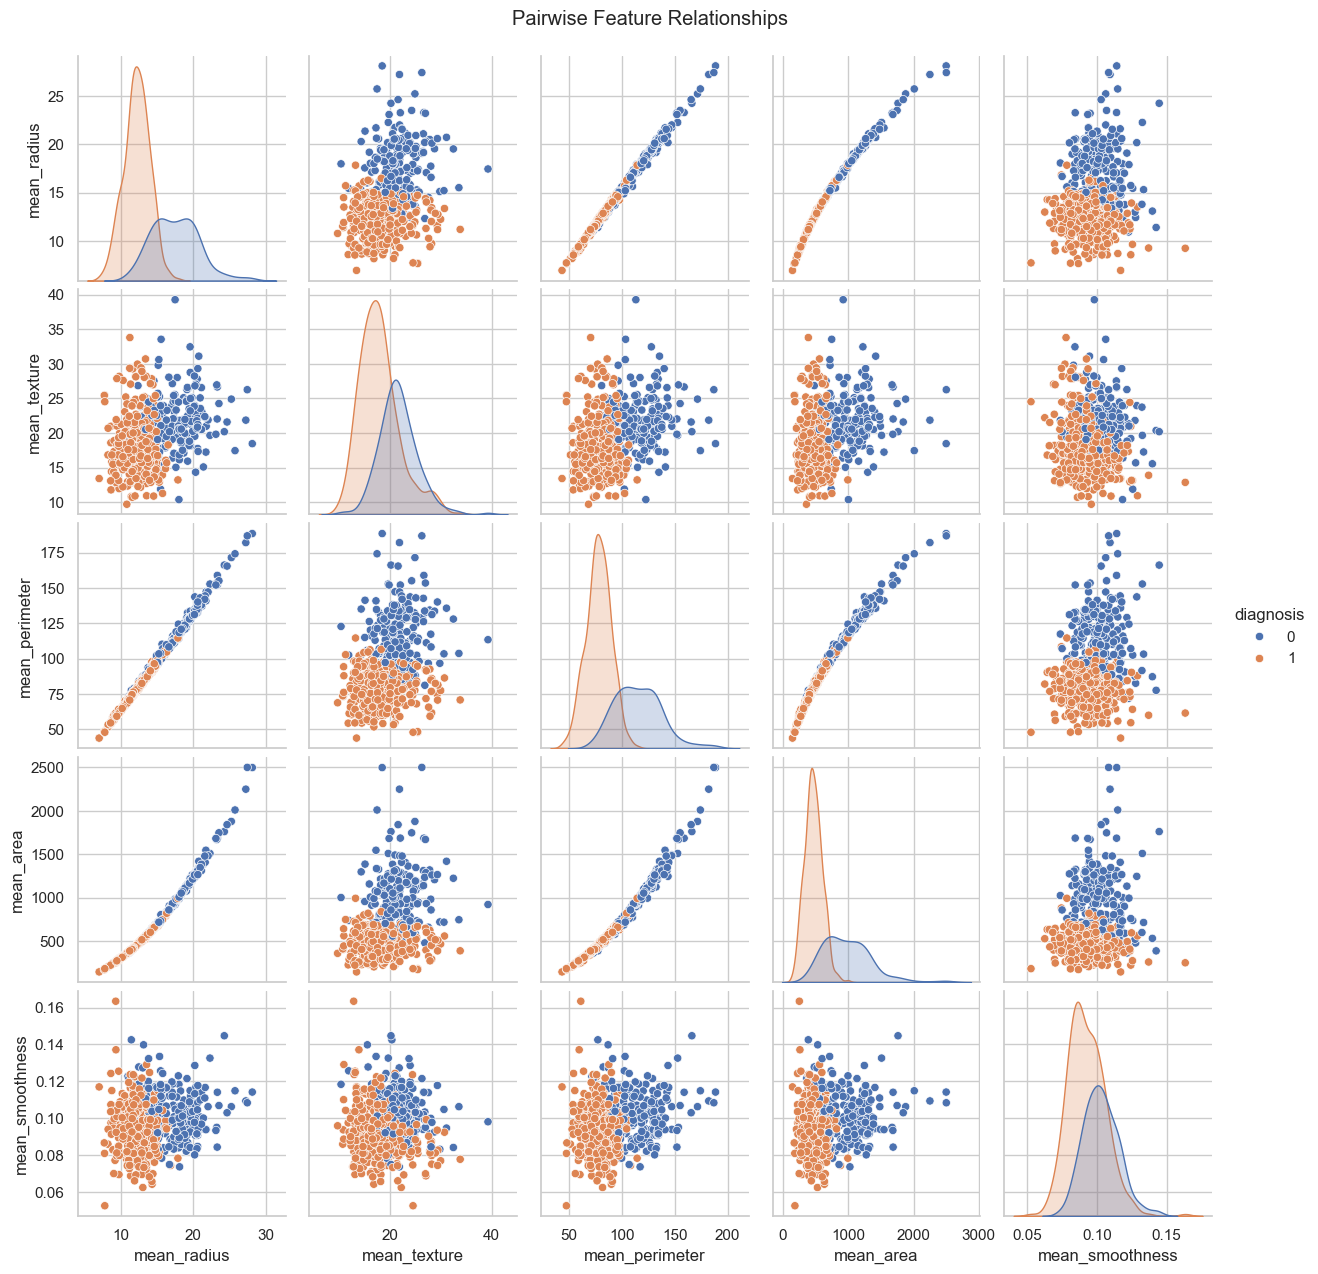

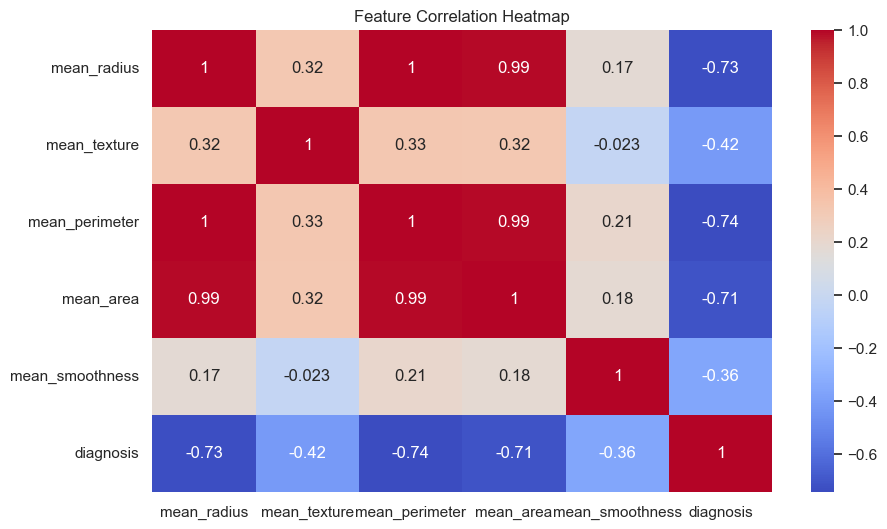

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Distribution(0 = Benign, 1 = Malignant)')
plt.show()

sns.pairplot(data, hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
corr = data.corr()
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('diagnosis', axis=1)
y=data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(acc)
print(f1)
print(classification_report(y_test, y_pred))

0.9473684210526315
0.9571428571428572
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [29]:
!pip install lightgbm

In [36]:
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

print(lr_acc, lr_f1)
print(lgb_acc, lgb_f1)

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [37]:
import tkinter as tk
from tkinter import messagebox

def predict_diagnosis():
    try:
        inputs = [float(entry.get()) for entry in entries]
        scaled_input = scaler.transform([inputs])
        prediction = lgb_model.predict(scaled_input)
        result = 'Malignant (Cancer)' if prediction[0] == 1 else 'Benign (No Cancer)'
        messagebox.showinfo('Prediction Result', f'The prediction is: {result}')
    except ValueError:
        messagebox.showerror('Input Error', 'Please enter valid numerical valuesl.')

window = tk.Tk()
window.title('Breast Cancer Prediction')
window.geometry('600x450')
window.configure(bg='#e6f2ff')

title_label = tk.Label(window, text='Breast Cancer Prediction', font=("Helvetica", 20, 'bold'), fg='#003366', bg='#e6f2ff')
title_label.pack(pady=10)

input_frame = tk.Frame(window, bg='#e6f2ff')
input_frame.pack(pady=10)

labels = [
    'Mean Radius', 'Mean Texture', 'Mean Perimeter', 
    'Mean Area', 'Mean Smoothness'
]

entries = []
for i, label in enumerate(labels):
    tk.Label(input_frame, text=label, font=('Arial', 12), bg='#e6f2ff').grid(row=i, column = 0, padx=10, pady = 8, sticky = 'w')
    entry = tk.Entry(input_frame, font=('Arial', 12), width=20)
    entry.grid(row=i, column=1, padx=10, pady=8)
    entries.append(entry)

predict_btn = tk.Button(window, text='Predict', font=('Arial', 14, 'bold'), bg='#0059b3', fg='white', command=predict_diagnosis)
predict_btn.pack(pady=20)

window.mainloop()

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
